## Observations and Insights

Capomulin performs the best at lowering tumor mass on average.
Tumor mass has a moderate positive correltation with weight.
Ketapril perform the worst at lowering tumor mass on average.

## Dependencies and starter code

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merge_data=mouse_metadata.merge(study_results,on='Mouse ID',how='outer')

## Summary statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table=merge_data.groupby('Drug Regimen').mean()
summary_table=summary_table.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites'])
summary_table=summary_table.rename(columns={'Tumor Volume (mm3)':'Mean'})
median=merge_data.groupby('Drug Regimen').median()
median=median.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites'])
median=median.rename(columns={'Tumor Volume (mm3)':'Median'})
summary_table['Median']=median['Median']
variance=merge_data.groupby('Drug Regimen').var()
variance=variance.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites'])
varaince=variance.rename(columns={'Tumor Volume (mm3)':'Varaince'})
summary_table['Varaince']=varaince['Varaince']
std_data=merge_data.groupby('Drug Regimen').std()
std_data=std_data.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites'])
std_data=std_data.rename(columns={'Tumor Volume (mm3)':'Standard Deviation'})
summary_table['Standard Deviation']=std_data['Standard Deviation']
sem_data=merge_data.groupby('Drug Regimen').sem()
sem_data=sem_data.drop(columns=['Age_months','Weight (g)','Timepoint','Metastatic Sites','Mouse ID', 'Sex'])
sem_data=sem_data.rename(columns={'Tumor Volume (mm3)':'SEM'})
summary_table['SEM']=sem_data['SEM']

summary_table

,Mean,Median,Varaince,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

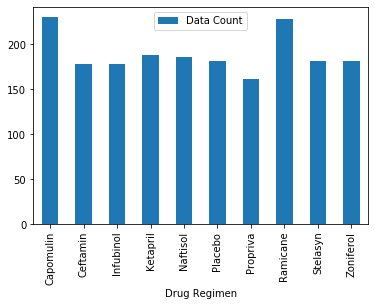

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
ax=merge_data.groupby('Drug Regimen').count().rename(columns={'Mouse ID':'Data Count'}).plot(kind='bar',y='Data Count')


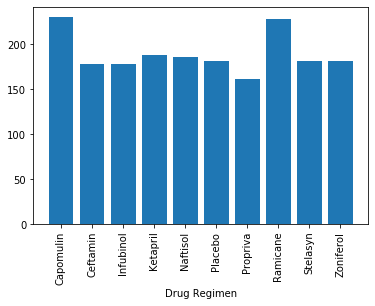

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
count=merge_data.groupby('Drug Regimen').count().rename(columns={'Mouse ID':'Data Count'})
plt.bar(count.index,count['Data Count'])
plt.xticks(rotation='vertical')
plt.xlabel('Drug Regimen')
plt.show()

## Pie plots

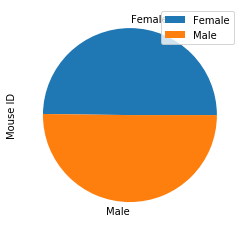

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
ax3=merge_data.groupby('Sex').nunique().plot(kind='pie',y='Mouse ID')
ax3

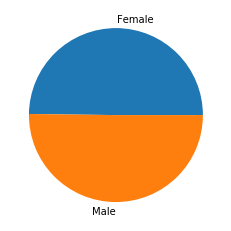

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_mouse=merge_data.groupby('Sex').nunique()
plt.pie(grouped_mouse['Mouse ID'],labels=grouped_mouse.index)
plt.show()

## Quartiles, outliers and boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
#final tumor volume for all drug regimens
top_four=['Capomulin','Ramicane','Ceftamin','Infubinol']
grouped_mouse_data=merge_data.groupby('Mouse ID').last()
final_tumor_volume=grouped_mouse_data[['Drug Regimen','Tumor Volume (mm3)']]
final_tumor_volume=final_tumor_volume.sort_values('Tumor Volume (mm3)')
final_tumor_volume=final_tumor_volume.reset_index()
top_four_volume=pd.DataFrame(index=np.arange(len(final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']==top_four[0])])))

q1=pd.DataFrame(index=np.arange(1))
q3=pd.DataFrame(index=np.arange(1))
iqr=pd.DataFrame(index=np.arange(1))
lower=pd.DataFrame(index=np.arange(1))
upper=pd.DataFrame(index=np.arange(1))
outliers=pd.DataFrame()

#Quartiles, IQR, and outliers for top four
for drug in top_four:
    
    volume=(final_tumor_volume.loc[(final_tumor_volume['Drug Regimen']==drug)]).reset_index()
    
    top_four_volume[drug]=volume['Tumor Volume (mm3)']
    q1[drug]=(np.percentile(top_four_volume[drug],25))
    q3[drug]=(np.percentile(top_four_volume[drug],75))
    iqr[drug]=(q3[drug]-q1[drug])
    lower[drug]=q1[drug]-(1.5*iqr[drug])
    upper[drug]=q1[drug]+(1.5*iqr[drug])
    lower_temp=lower.loc[0,drug]
    upper_temp=upper.loc[0,drug]
    outliers=top_four_volume.loc[(top_four_volume[drug]<=lower_temp)|(top_four_volume[drug]>=upper_temp)]
outliers   

,Capomulin,Ramicane,Ceftamin,Infubinol
0,23.343598,22.050126,45.000000,36.321346
24,47.685963,45.220869,68.923185,72.226731


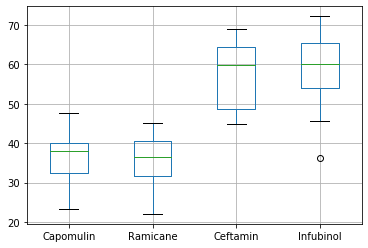

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax4=top_four_volume.boxplot(column=top_four)


## Line and scatter plots

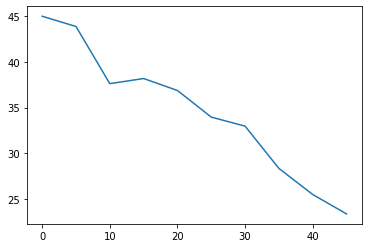

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#capomulin_volume_treatment=merge_data.groupby('Drug Regimen')
capomulin_volume_treatment=merge_data.loc[(merge_data['Drug Regimen']=='Capomulin')].reset_index()
capomulin_volume_treatment
mouse_s185_volume=capomulin_volume_treatment.loc[(capomulin_volume_treatment['Mouse ID']=='s185')]
mouse_s185_volume
plt.plot(mouse_s185_volume['Timepoint'],mouse_s185_volume['Tumor Volume (mm3)'])
plt.show()

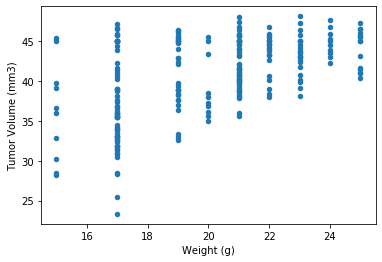

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin_volume_treatment.plot(kind='scatter',x='Weight (g)',y= 'Tumor Volume (mm3)')

The correlation coefficient is 0.5256995552077166


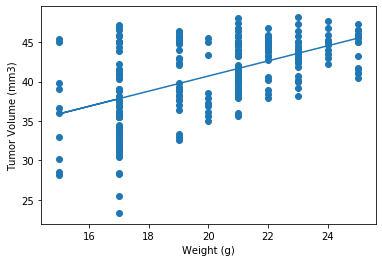

In [18]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, _, _) = linregress(capomulin_volume_treatment['Weight (g)'], capomulin_volume_treatment['Tumor Volume (mm3)'])
print(f'The correlation coefficient is {rvalue}')
fit=slope*capomulin_volume_treatment['Weight (g)']+intercept
ax6=plt.subplot()
ax6.plot(capomulin_volume_treatment['Weight (g)'],fit)
ax6.scatter(capomulin_volume_treatment['Weight (g)'], capomulin_volume_treatment['Tumor Volume (mm3)'])
ax6.set_xlabel('Weight (g)')
ax6.set_ylabel('Tumor Volume (mm3)')
plt.show()